In [55]:
import todolist
from todolist import * 
import time
import matplotlib.pyplot as plt

In [16]:
def value_iteration(mdp, gamma=1.0):
    """
    Given a ToDoListMDP, perform value iteration/backward induction to find the optimal policy
    Input: MDP, gamma decay
    Output: Optimal policy, number of iterations, empirical runtime
    """
    numTasks = len(mdp.getTasksList())
    V_states = {}
    for t in range(end_time + 2):
        bit_vectors = list(itertools.product([0, 1], repeat=numTasks))
        for bv in bit_vectors:
            state = (bv, t)
            V_states[state] = (0, None)

    start = time.time()
    
    # perform value iteration with s iterations
    converged = False
    iterations = 0
    # print V_states
    while not converged:
        print('iteration', iterations)
        iterations += 1
        next_V_states = {} 
        converged = True
        for state in V_states:
            next_V_states[state] = choose_action(mdp, state, V_states)

            old_state_value = V_states[state][0]
            new_state_value = best_value
            if abs(old_state_value - new_state_value) > 0.1:
                converged = False
        V_states = next_V_states

    end = time.time()

    start_state = (tuple([0 for _ in range(numTasks)]), 0)
    state = start_state
    optimal_tasks = []
    while not mdp.isTerminal(state):
        optimal_value = V_states[state][0]
        optimal_action = V_states[state][1]
        # print "opt action", optimal_action
        task = mdp.getTasksList()[optimal_action]
        next_state_tasks = list(state[0])[:]
        next_state_tasks[optimal_action] = 1
        next_state = (tuple(next_state_tasks), state[1] + task.getTimeCost())
        state = next_state
        optimal_tasks.append(task)

    optimal_policy = [task.getDescription() for task in optimal_tasks]
    time_elapsed = end - start
    
    return optimal_policy, iterations, time_elapsed

def get_Q_value(mdp, state, action, V_states):
    total = 0
    trans_states_and_probs = mdp.getTransitionStatesAndProbs(state, action)
    for pair in trans_states_and_probs:
        next_state = pair[0]
        tasks = next_state[0]
        time = next_state[1]
        prob = pair[1]
        next_state_value = V_states[next_state][0]
        total += prob * (mdp.getReward(state, action, next_state) + gamma * next_state_value)
    return total

def choose_action(mdp, state, V_states):
    possible_actions = mdp.getPossibleActions(state)   
    best_action = None
    best_value = -float('inf')
    if len(possible_actions) == 0:
        best_value = 0
    for a in possible_actions:
        q_value = get_Q_value(mdp, state, a, V_states)
        if q_value > best_value:
            best_value = q_value
            best_action = a
    return (best_value, best_action)

def policy_evaluation(mdp, policy):
    """
    given an MDP and a policy dictionary (from policy improvement)
    returns the V states for that policy for each state. V_states: {state: (V(s), action)}
    """
    

    
def policy_extraction(mdp, V_states):
    """
    given an MDP and V_states (from policy evaluation)
    returns the optimal policy (policy is dictionary{states: action index})
    """
    # for every state, pick the action corresponding to the highest Q-value
    policy = {}
    states = []
    for state in states: 
        
        policy[state]
        
    for t in range(end_time + 2):
        bit_vectors = list(itertools.product([0, 1], repeat=numTasks))
        for bv in bit_vectors:
            state = (bv, t)
            policy[state] = (0, None)


    
    



In [19]:
goals1 = [
    Goal("Goal A", [
        Task("Task A1", 1)], 
        {1: 100},
        penalty=-10000),
    Goal("Goal B", [
        Task("Task B2", 1)], 
        {1: 10},
        penalty=-1000)
]

goals2 = [
    Goal("Goal A", [
        Task("Task A1", 1), 
        Task("Task A2", 1)], 
        {10: 100},
        penalty=-10),
    Goal("Goal B", [
        Task("Task B1", 2),  
        Task("Task B2", 2)], 
        {1: 10, 10: 10},
        penalty=0),
    Goal("Goal C", [
        Task("Task C1", 3),  
        Task("Task C2", 3)], 
        {1: 10, 6: 100},
        penalty=-1)
]

goals3 = [
    Goal("Goal A", [
        Task("Task A1", 1), 
        Task("Task A2", 1)], 
        {10: 100},
        penalty=-10),
    Goal("Goal B", [
        Task("Task B1", 2),  
        Task("Task B2", 2)], 
        {1: 10, 10: 10},
        penalty=0),
    Goal("Goal C", [
        Task("Task C1", 3),  
        Task("Task C2", 3)], 
        {1: 10, 6: 100},
        penalty=-1), 
    Goal("Goal D", [
        Task("Task D1", 3),  
        Task("Task D2", 3)], 
        {20: 100, 40: 10},
        penalty=-10),
]

goals4 = [
    Goal("Goal A", [
        Task("Task A1", 1), 
        Task("Task A2", 1)], 
        {10: 100},
        penalty=-10),
    Goal("Goal B", [
        Task("Task B1", 2),  
        Task("Task B2", 2)], 
        {1: 10, 10: 10},
        penalty=0),
    Goal("Goal C", [
        Task("Task C1", 3),  
        Task("Task C2", 3)], 
        {1: 10, 6: 100},
        penalty=-1), 
    Goal("Goal D", [
        Task("Task D1", 3),  
        Task("Task D2", 3)], 
        {20: 100, 40: 10},
        penalty=-10),
    Goal("Goal E", [
        Task("Task E1", 3),  
        Task("Task E2", 3)], 
        {60: 100, 70: 10},
        penalty=-110),
]

goals5 = [
    Goal("Goal A", [
        Task("Task A1", 1), 
        Task("Task A2", 1)], 
        {10: 100},
        penalty=-10),
    Goal("Goal B", [
        Task("Task B1", 2),  
        Task("Task B2", 2)], 
        {1: 10, 10: 10},
        penalty=0),
    Goal("Goal C", [
        Task("Task C1", 3),  
        Task("Task C2", 3)], 
        {1: 10, 6: 100},
        penalty=-1), 
    Goal("Goal D", [
        Task("Task D1", 3),  
        Task("Task D2", 3)], 
        {20: 100, 40: 10},
        penalty=-10),
    Goal("Goal E", [
        Task("Task E1", 3),  
        Task("Task E2", 3)], 
        {60: 100, 70: 10},
        penalty=-110),
    Goal("Goal F", [
        Task("Task F1", 3),  
        Task("Task F2", 3)], 
        {60: 100, 70: 10},
        penalty=-110),
]

goals6 = [
    Goal("Goal A", [
        Task("Task A1", 1), 
        Task("Task A2", 1)], 
        {10: 100},
        penalty=-10),
    Goal("Goal B", [
        Task("Task B1", 2),  
        Task("Task B2", 2)], 
        {1: 10, 10: 10},
        penalty=0),
    Goal("Goal C", [
        Task("Task C1", 3),  
        Task("Task C2", 3)], 
        {1: 10, 6: 100},
        penalty=-1), 
    Goal("Goal D", [
        Task("Task D1", 3),  
        Task("Task D2", 3)], 
        {20: 100, 40: 10},
        penalty=-10),
    Goal("Goal E", [
        Task("Task E1", 3),  
        Task("Task E2", 3)], 
        {60: 100, 70: 10},
        penalty=-110),
    Goal("Goal F", [
        Task("Task F1", 3),  
        Task("Task F2", 3)], 
        {60: 100, 70: 10},
        penalty=-110),
    Goal("Goal G", [
        Task("Task G1", 3),  
        Task("Task G2", 3)], 
        {60: 100, 70: 10},
        penalty=-110),
]


In [22]:
# plotting number of tasks vs runtime with time kept constant at 500

end_time = 500
goals_list = [goals1, goals2, goals3, goals4, goals5, goals6]
iterations_list = []
times = []

for i in range(len(goals_list)):
    print('goals', i+1)
    goals = goals_list[i]
    todolist = ToDoList(goals, start_time=0, end_time=end_time)
    mdp = ToDoListMDP(todolist)
    policy, iterations, time_elapsed = value_iteration(mdp)
    iterations_list.append(iterations)
    times.append(time_elapsed)
    print(time_elapsed)
    print()


goals 1
iteration 0
iteration 1
iteration 2
0.08516907691955566

goals 2
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
7.789433002471924

goals 3
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
53.88784098625183

goals 4
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
396.3283669948578

goals 5
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
2364.0804438591003

goals 6
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
13952.99704003334



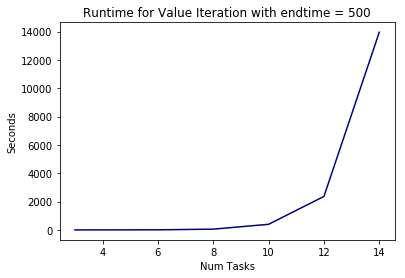

In [32]:
num_tasks = [3, 6, 8, 10, 12, 14]
plt.clf()
plt.plot(num_tasks, times, color="navy", label="validation set")
plt.xlabel('Num Tasks')
plt.ylabel('Seconds')
plt.title("Runtime for Value Iteration (endtime = 500)")
plt.show()

['Task C1',
 'Task C2',
 'Task A1',
 'Task A2',
 'Task B1',
 'Task B2',
 'Task D1',
 'Task D2',
 'Task E1',
 'Task E2',
 'Task F1',
 'Task F2',
 'Task G1',
 'Task G2']

<module 'mdp' from '/Users/nicholascai/Documents/workspace/class/spring17/coco/todolistMDP/mdp.py'>

In [56]:
todolist = ToDoList(goals1, start_time=0, end_time=end_time)
todomdp = ToDoListMDP(todolist)
todomdp.getStates()

NameError: name 'abstract' is not defined